<h1> Import Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

<h1>Loading the dataset</h1>

In [2]:
dengue = pd.read_csv('dataset\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.describe().sum()

Year             13129.414907
Dengue_Cases     27590.035348
Dengue_Deaths     2794.871941
dtype: float64

In [5]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [8]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Convert 'Month' to categorical with proper order </h1>

In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

<h1>Total Dengue Cases per Year</h1>

In [10]:
cases_per_year = dengue.groupby('Year')['Dengue_Cases'].sum()

In [11]:
cases_per_year

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

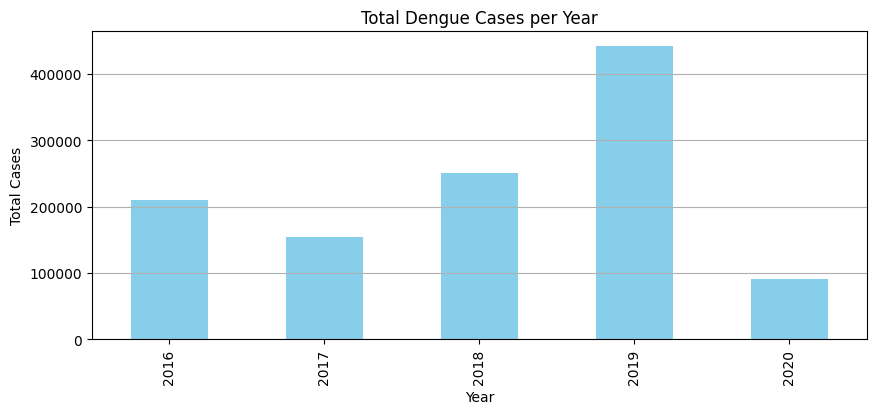

In [12]:
plt.figure(figsize=(10, 4))
cases_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(axis='y')
plt.show()


<h2 style="color: Green;">1.  A significant rise in cases may indicate environmental factors or gaps in public health interventions.</h2>


<h1>Total Dengue Deaths per Year</h1>

In [13]:
deaths_per_year = dengue.groupby('Year')['Dengue_Deaths'].sum()

In [14]:
deaths_per_year

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64

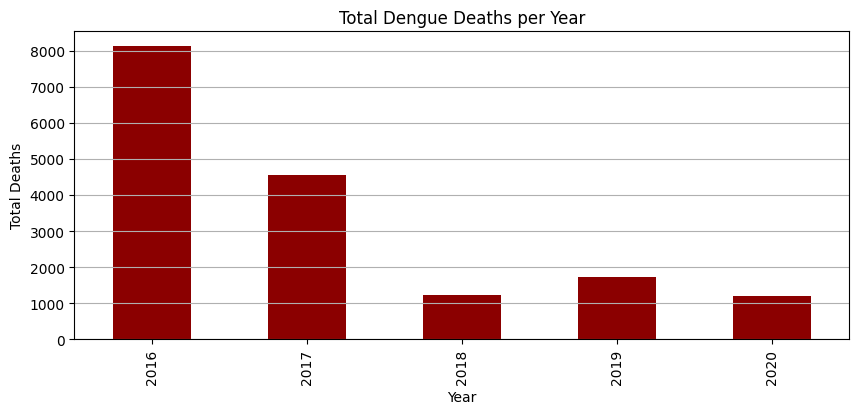

In [15]:
plt.figure(figsize=(10, 4))
deaths_per_year.plot(kind='bar', color='darkred')
plt.title('Total Dengue Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(axis='y')
plt.show()

<h2>2. Insight: If deaths remain high despite stable or declining cases, it suggests possible issues in healthcare response.</h2>

<h1>  Monthly Trend of Dengue Cases</h1>

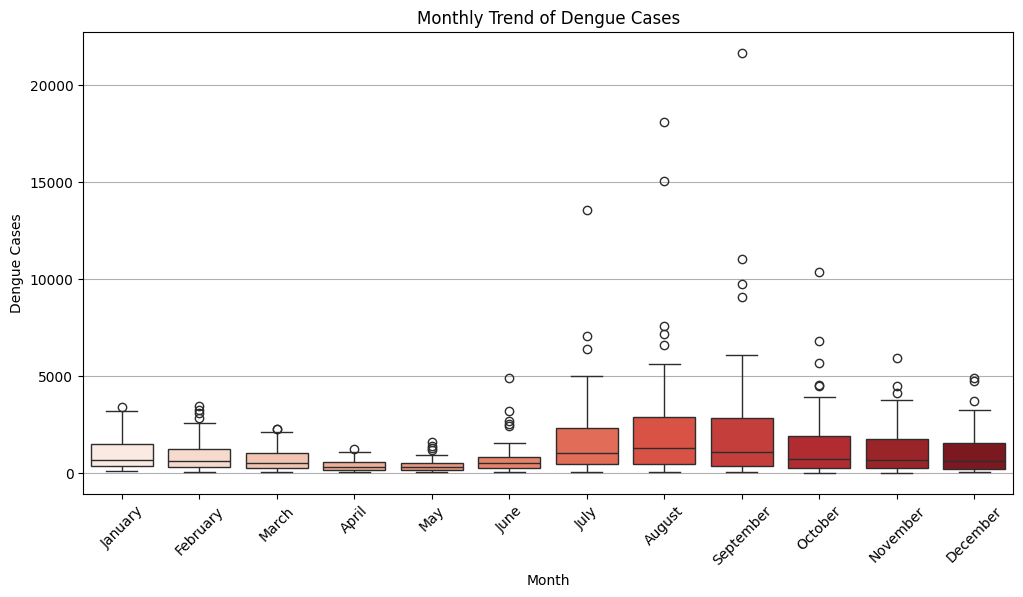

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Dengue_Cases', data=dengue, palette='Reds')
plt.title('Monthly Trend of Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<h2>3. Insight: Higher cases tend to occur in specific months, potentially aligning with seasonal patterns like the rainy season.</h2>

<h1>Region-wise Dengue Cases</h1>

In [17]:
cases_per_region = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)

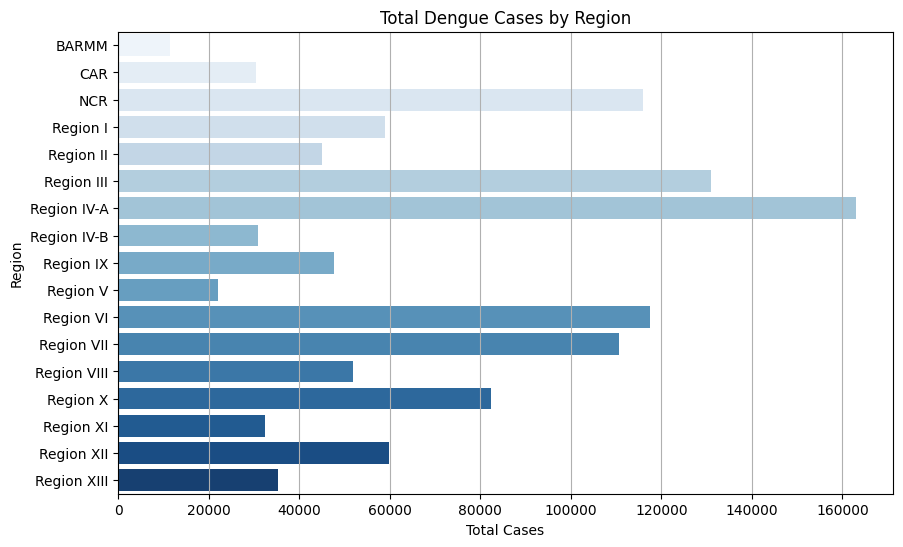

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_per_region.values, y=cases_per_region.index, palette='Blues')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Total Cases')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

<h2>4. Insight:Some regions report significantly higher dengue cases than others, indicating localized factors such as climate, urban population density, or stagnant water sources that contribute to mosquito breeding.</h2>

<h1> Yearly Trend of Dengue Cases</h1>

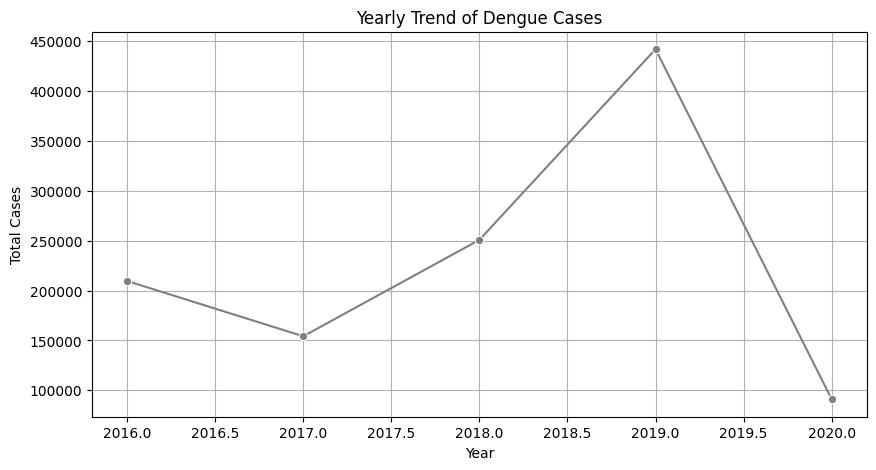

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=dengue, x='Year', y='Dengue_Cases', ci=None, estimator='sum', color='grey', marker='o')
plt.title('Yearly Trend of Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

<h2>5. The line chart visualizes whether dengue cases have an increasing or decreasing trend over time.</h2>

<h1> Dengue Cases and Deaths Correlation</h1>

In [20]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr().unstack()
print("Correlation Between Dengue Cases and Deaths:\n", correlation)

Correlation Between Dengue Cases and Deaths:
 Dengue_Cases   Dengue_Cases     1.000000
               Dengue_Deaths    0.038322
Dengue_Deaths  Dengue_Cases     0.038322
               Dengue_Deaths    1.000000
dtype: float64


<h2>6. Insight: A strong positive correlation suggests that more cases often lead to more deaths, emphasizing the need for early detection and treatment.</h2>

<h1>Heatmap of Dengue Cases and Deaths</h1>

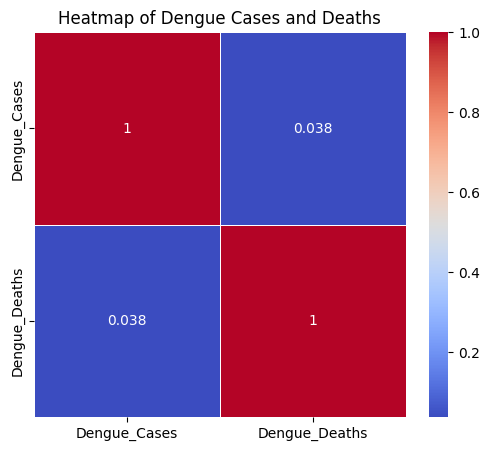

In [21]:
plt.figure(figsize=(6, 5))
sns.heatmap(dengue[['Dengue_Cases', 'Dengue_Deaths']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Dengue Cases and Deaths')
plt.show()

<h2>7. Insight: The heatmap confirms the strong relationship between dengue cases and deaths, reinforcing the need for preventive healthcare measures.</h2>


<h1> Scatter Plot of Dengue Cases vs Deaths</h1>

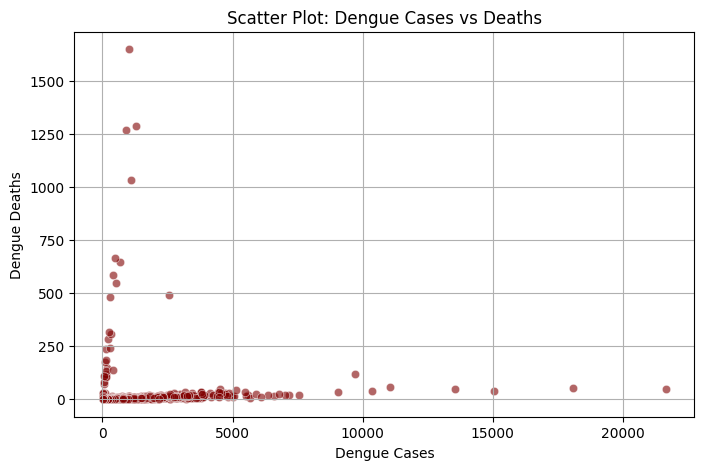

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dengue_Cases', y='Dengue_Deaths', data=dengue, alpha=0.6, color='maroon')
plt.title('Scatter Plot: Dengue Cases vs Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.show()

<h2>8.Insight: The scatter plot will likely show a positive trend, meaning that as dengue cases increase, dengue-related deaths also tend to rise. This indicates that higher case counts can lead to more fatalities, emphasizing the need for early intervention.</h2>

<h2 style="color: Green;">9. Insight: Some points may be significantly higher than the rest, indicating specific outbreaks where the fatality rate was unusually high. Identifying these points can help target areas where healthcare interventions were insufficient or delayed.</h2>

<h1> Boxplot of Dengue Cases by Region</h1>

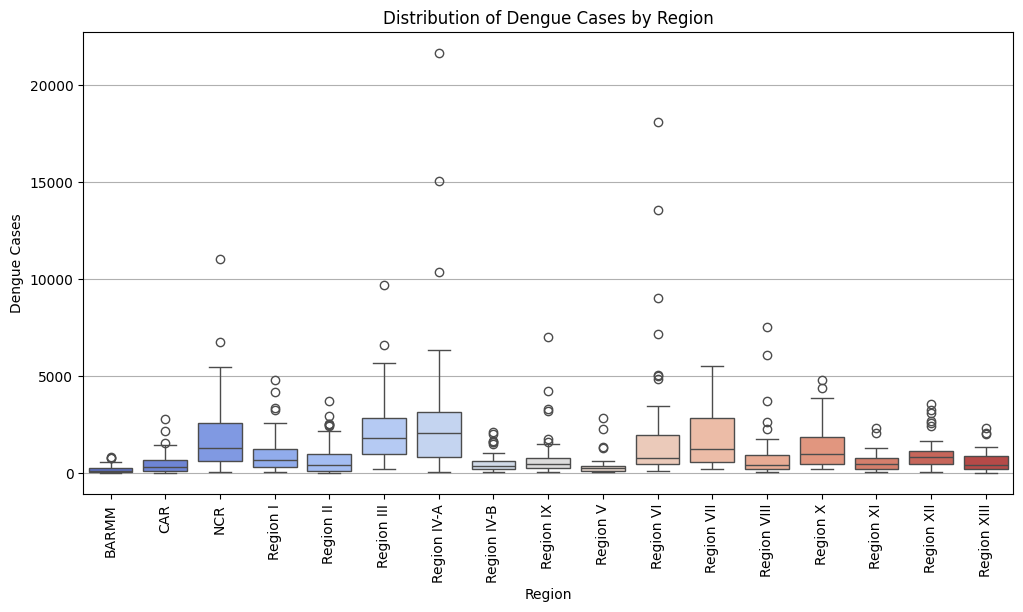

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Dengue_Cases', data=dengue, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribution of Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.grid(axis='y')
plt.show()

<h2 style="color: Green;">10. Insight: Regions with a higher median line in the boxplot indicate consistently high dengue cases, signaling potential hotspots that require sustained intervention.</h2>

<h2 style="color: Green;"> 11. Insight: The spread of cases varies significantly among regions, highlighting disparities in outbreaks.</h2>

<h1> Lineplot with confidence interval for Dengue Cases</h1>

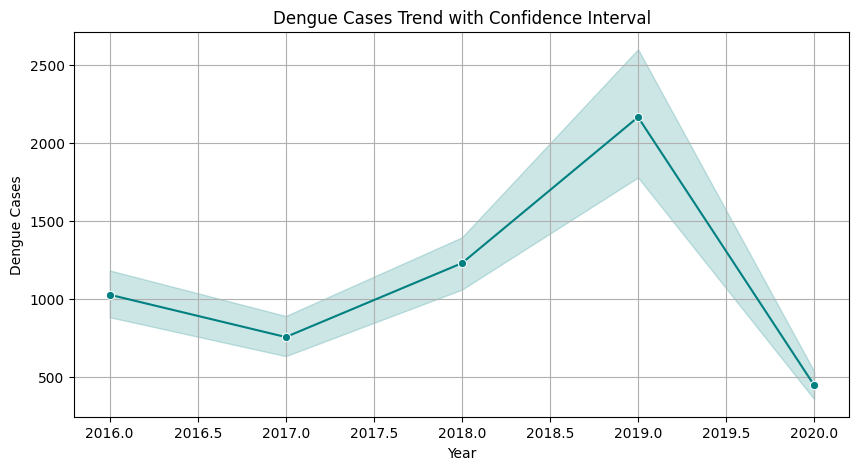

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Dengue_Cases', data=dengue,  marker='o', color='teal')
plt.title('Dengue Cases Trend with Confidence Interval')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.grid(True)
plt.show()

<h2 style="color: Green;">12. Insight: The confidence interval shows the reliability of the reported case trends, indicating potential prediction ranges.</h2>

<h2 style="color: Green;">13. Insight: The shaded area around the line represents the confidence interval, which helps measure uncertainty. A wider CI suggests more variability in the data, while a narrower CI indicates consistent trends.</h2>

<h1>  Region-wise Dengue Deaths</h1>

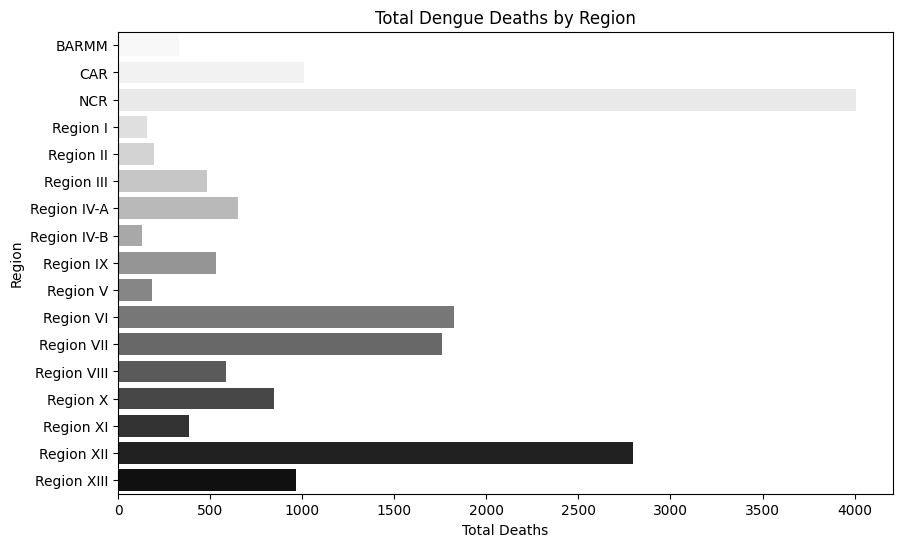

In [25]:
deaths_per_region = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_per_region.values, y=deaths_per_region.index, palette='Greys')
plt.title('Total Dengue Deaths by Region')
plt.xlabel('Total Deaths')
plt.ylabel('Region')
plt.show()

<h2 style="color: Green;">14.Insight: Higher deaths in certain regions suggest gaps in healthcare response or late detection of severe dengue cases.</h2>

<h1>Monthly Dengue Deaths Trend </h1>

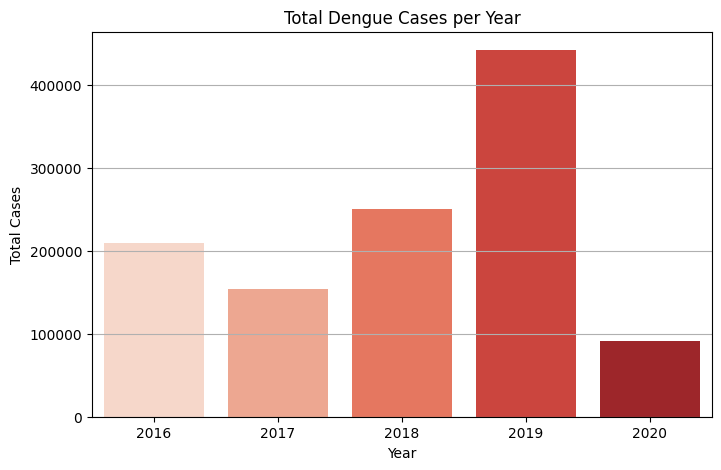

In [26]:
cases_per_year = dengue.groupby('Year')['Dengue_Cases'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=cases_per_year.index, y=cases_per_year.values, palette='Reds')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(axis='y')
plt.show()

<h2 style="color: Green;">15. Insight: Dengue cases fluctuate yearly, indicating potential seasonal or environmental factors affecting outbreaks.</h2>

<h1> 13. Monthly Trend of Dengue Deaths</h1>

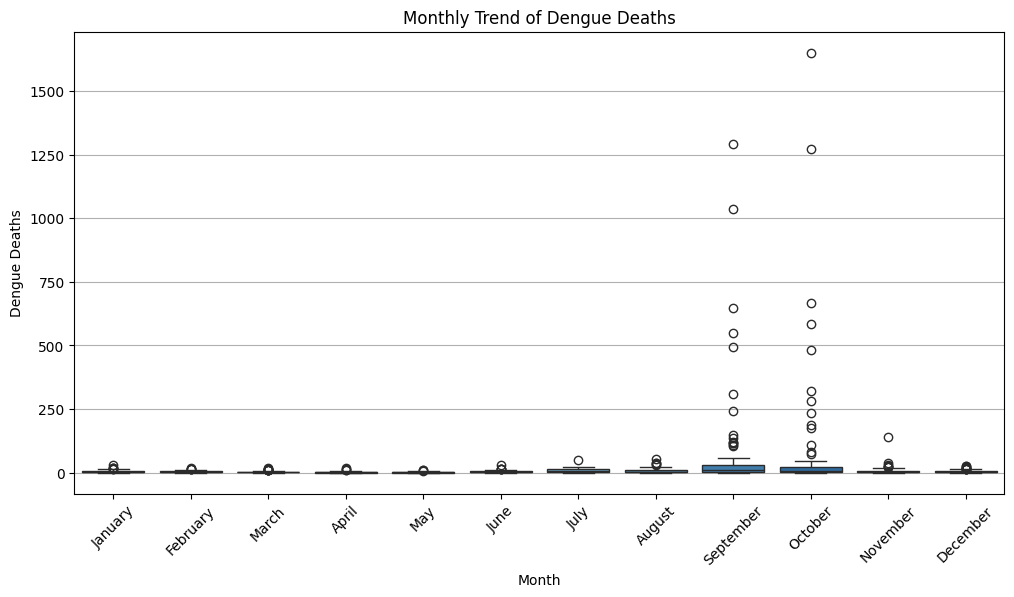

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Dengue_Deaths', data=dengue, palette='Blues')
plt.title('Monthly Trend of Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<h2 style="color: Green;">16. Insight: The months with the highest dengue cases also tend to have the highest deaths, reinforcing the need for timely medical response.</h2>

<h1>  Distribution of Dengue Cases</h1>

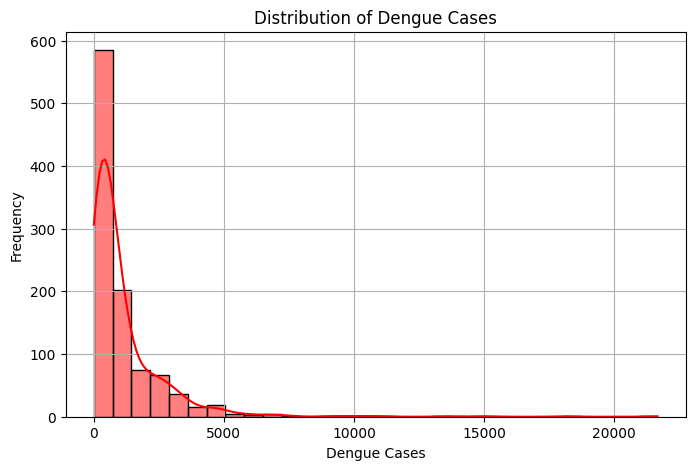

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(dengue['Dengue_Cases'], bins=30, kde=True, color='red')
plt.title('Distribution of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<h2 style="color: Green;">17. Insight: The distribution shows that most cases fall within a certain range, with some extreme outbreaks.
<h2>

<h1> Pairplot to visualize relationships</h1>

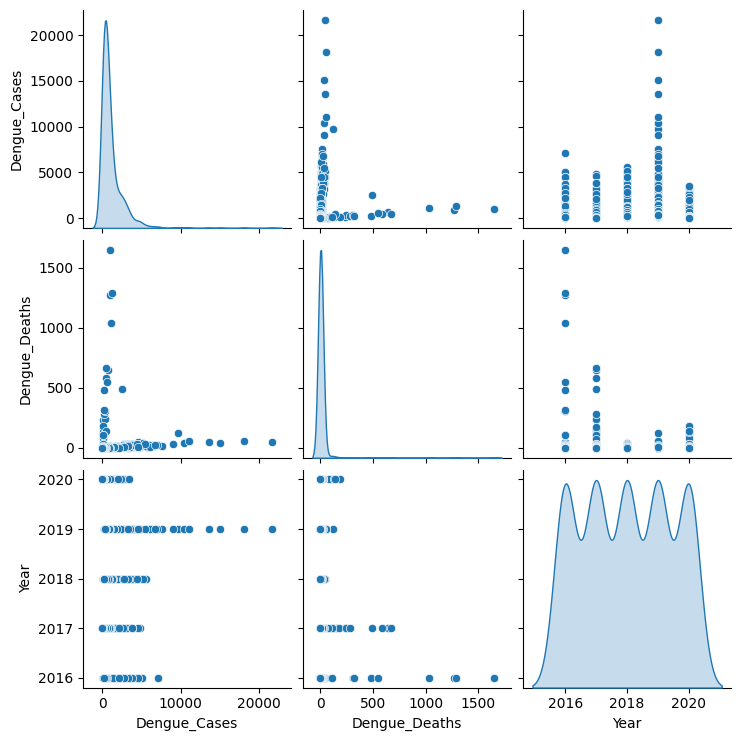

In [29]:
sns.pairplot(dengue[['Dengue_Cases', 'Dengue_Deaths', 'Year']], diag_kind='kde', palette='husl')
plt.show()

<h2 style="color: Green;">18. Insight: The pairplot helps visualize trends and relationships among cases, deaths, and time progression.</h2>

<h2 style="color: Green;">19. Insight: The distribution of points over the years indicates that dengue cases and deaths fluctuate over time, likely due to environmental factors, intervention efforts, or changes in mosquito population dynamics</h2>

<h2 style="color: Green;">20. Insight:The scatterplots in the pairplot suggest that as dengue cases increase, deaths also tend to rise, reinforcing the direct impact of outbreaks on fatality rates.</h2>